<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter2/Python_Codes_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 2.1

In [23]:
%reset -f

from sympy import symbols, solve

print('-'*28,'CODE OUTPUT','-'*29,'\n')

m1, m2, a, g, T = symbols('m1,m2,a,g,T')

eq_1 = m1*g - T + m1*a
eq_2 = m2*g - T - m2*a

soln = solve((eq_1,eq_2),(a,T)) #solution to system of equations

print('a = ', soln[a])
print('T = ', soln[T])

---------------------------- CODE OUTPUT ----------------------------- 

a =  (-g*m1 + g*m2)/(m1 + m2)
T =  2*g*m1*m2/(m1 + m2)


# Example 2.2

In [24]:
%reset -f

from sympy import symbols, dsolve, Function, diff, sin, cos
import matplotlib.pyplot as plt
import numpy as np

print('-'*28,'CODE OUTPUT','-'*29,'\n')

g, theta, mu, x0, v0, t = symbols('g, theta, mu, x0, v0, t',real=True)
x = Function('x')                       # define position function x

a = g*sin(theta)-mu*g*cos(theta)      # define acceleration a

# initial conditions x(0)=x0 and v(0)=v0
initconds = {x(0):x0, diff(x(t),t).subs(t, 0): v0}

# use dsolve to solve the ODE x''(t)=a
solnx = dsolve(diff(x(t),t,t)-a,x(t), ics=initconds).rhs

solnv = diff(solnx,t)                   # evaluate v = dx/dt
print(' x(t) = ', solnx)                # print x(t)

print('\nv(t) = ',solnv)                # print v(t)



---------------------------- CODE OUTPUT ----------------------------- 

 x(t) =  g*t**2*(-mu*cos(theta) + sin(theta))/2 + t*v0 + x0

v(t) =  g*t*(-mu*cos(theta) + sin(theta)) + v0


# Example 2.3

---------------------------- CODE OUTPUT ----------------------------- 

 x(t) =  -c*log(b**2 + t**2)/(2*m) + (c*log(b**2) + 2*m*x0)/(2*m) +
c*t*atan(t/b)/(b*m)

v(t) =  c*atan(t/b)/(b*m)


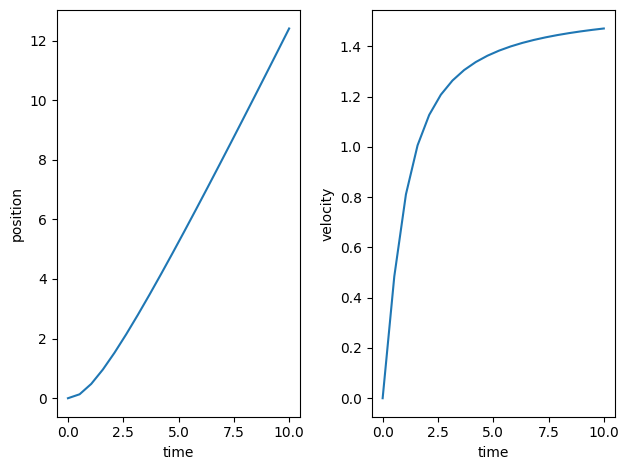

In [25]:
%reset -f

from sympy import symbols, dsolve, Function, diff, simplify, lambdify
import textwrap
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

m, c, b, t, x0 = symbols('m, c, b, t, x0',real=True)
x = Function('x')

initconds = {x(0):x0, diff(x(t),t).subs(t, 0): 0}
solnx = dsolve(m*diff(x(t),t,t)-c/(t**2+b**2),x(t), \
    ics=initconds).rhs

solnv = diff(solnx,t)                            # v = dx/dt
print(' x(t) = ', textwrap.fill(str(solnx),70))  # print x(t)
print('\nv(t) = ',simplify(solnv))               # print v(t)

xt = solnx.subs({c:1,m:1,x0:0,b:1})     # substitute values of constants
vt = solnv.subs({c:1,m:1,x0:0,b:1})     # substitute values of constants

position = lambdify(t,xt,'numpy')
velocity = lambdify(t, vt,'numpy')
times = np.linspace(0,10,20)            # times t=0-10

fig, ax = plt.subplots(nrows=1,ncols=2) # use 2 subplots for x(t),v(t)
ax[0].plot(times, position(times))
ax[0].set_xlabel('time')
ax[0].set_ylabel('position')
ax[1].plot(times, velocity(times))
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
fig.tight_layout()


# Example 2.4

In [26]:
%reset -f

from sympy import symbols, dsolve, Function, diff,simplify, oo
print('-'*28,'CODE OUTPUT','-'*29,'\n')

t, x0, v0 = symbols(' t, x0, v0')
m, b = symbols('m, b', positive=True)
x = Function('x')

inits = {x(0):x0, diff(x(t),t).subs(t, 0): v0}
solnx = dsolve(m*diff(x(t),t,t)+b*diff(x(t),t),x(t),ics=inits).rhs

print(' x(t) = ', simplify(solnx))      # print x(t)
solnv = diff(solnx,t)                   # v = dx/dt

print('\nv(t) = ',simplify(solnv))      # print v(t)
print('The limit of v(t) at large time t = ',solnv.limit(t,oo))
print('The limit of x(t) at large time t = ',solnx.limit(t,oo))


---------------------------- CODE OUTPUT ----------------------------- 

 x(t) =  x0 + m*v0/b - m*v0*exp(-b*t/m)/b

v(t) =  v0*exp(-b*t/m)
The limit of v(t) at large time t =  0
The limit of x(t) at large time t =  (b*x0 + m*v0)/b


# Example 2.6

In [27]:
%reset -f

from sympy import symbols, integrate,logcombine,solve,cosh, sinh,log
print('-'*28,'CODE OUTPUT','-'*29,'\n')

v, vf, vt, t1, m, c, t= symbols('v, vf, vt, t1, m, c, t',\
 real=True,positive=True)

# evaluate integral after factoring
integral = integrate(1/(v-vt),(v,0,vf))- integrate(1/(v+vt),(v,0,vf))

# combine logarithmic terms from inetgration
result = logcombine(integral,force=True)*(m/c)/(2*vt)
print('t = ',result )

v = solve(t+result,vf)[0]    # invert equation to find speed v(t)
print('v(t) = ',v)

# integrate to find x(t)
x = integrate(vt*sinh(c*t*vt/m)/cosh(c*t*vt/m),(t,0,t1))
print('x(t) = ',x)



---------------------------- CODE OUTPUT ----------------------------- 

t =  m*log(-(vf - vt)/(vf + vt))/(2*c*vt)
v(t) =  vt*tanh(c*t*vt/m)
x(t) =  m*log(cosh(c*t1*vt/m))/c


# Example 2.7

In [28]:
%reset -f

from sympy import diff as D
from sympy import symbols, Function, dsolve

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = Function('x')
t, x0, v0 = symbols('t, x0, v0',real=True)
k, m = symbols('k, m',real=True, positive=True)

# initial conditions
init = {x(0):x0,D(x(t),t).subs(t,0):v0}

#use dsolve to find solution of ODE
soln = dsolve(m*D(x(t),t,t) + k*x(t), simplify=True, ics=init).rhs

# substitute v(0)=0 using .subs
print('The solution is x(t) = ', soln.subs(v0,0))



---------------------------- CODE OUTPUT ----------------------------- 

The solution is x(t) =  x0*cos(sqrt(k)*t/sqrt(m))


# Example 2.8

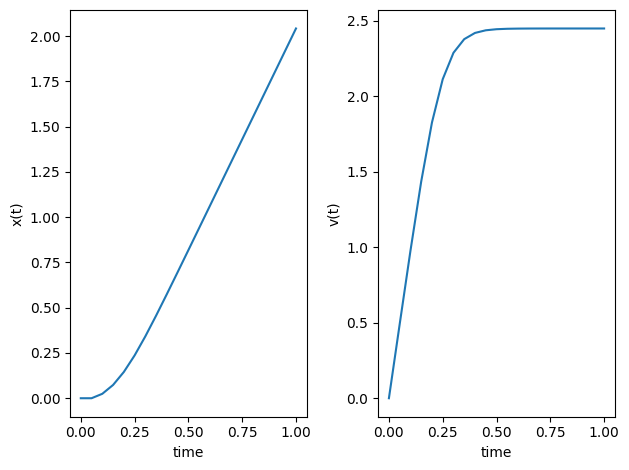

In [29]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np

dt, t_max = 0.05, 1       #step size, maximum time
num_steps = int(t_max/dt) #number of Euler steps
m, g, c = 3.0, 9.8, 2.0   #parameters and coefficients

times = np.arange(0,t_max + dt,dt) # times for x(t), v(t)

def f(v):                 #define the acceleration function
    return (g - c/m*v**3)

x = np.zeros(num_steps+1) #define x,v arrays
v = np.zeros(num_steps+1)
x[0], v[0] = 0 ,0               # initial conditions

for i in range(1,num_steps+1):
    x[i] = x[i-1] + v[i-1] * dt
    v[i] = v[i-1] + f(v[i-1]) * dt

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(times,x)
ax[0].set_xlabel("time")
ax[0].set_ylabel("x(t)")
ax[1].plot(times,v)
ax[1].set_xlabel("time")
ax[1].set_ylabel("v(t)")
fig.tight_layout()



# Example 2.9

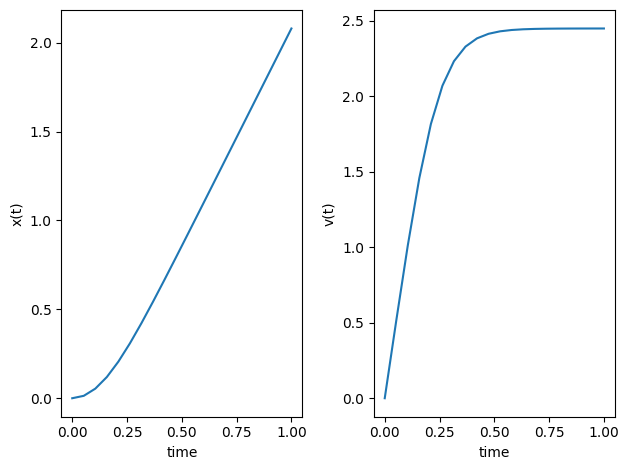

In [30]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

m, g, c = 3.0, 9.8, 2.0   #parameters and coefficients

#define function that returns coupled ODEs
def deriv(y, time):
    return (y[1], g - c/m*y[1]**3)

t = np.linspace(0,1,20)      # time values
yinit = (0,0)              #initial conditionss

soln = odeint(deriv, yinit, t)  #solve the system of ODEs using odeint

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(t,soln[:,0])     #plot position
ax[0].set_xlabel("time")
ax[0].set_ylabel("x(t)")
ax[1].plot(t,soln[:,1])     #plot time
ax[1].set_xlabel("time")
ax[1].set_ylabel("v(t)")
fig.tight_layout()



# Example 2.10

In [31]:
%reset -f

from scipy.integrate import quad
import numpy as np

print('-'*28,'CODE OUTPUT','-'*29,'\n')

a0, omega, phi = 0.3, 1.5, np.pi/3

F = lambda t: a0*np.sin(omega * t + phi)**2

integral = quad(F,0,3)

print('The integral = ', integral[0])
print('The absolute error =', integral[1])



---------------------------- CODE OUTPUT ----------------------------- 

The integral =  0.5430573299677108
The absolute error = 1.974040231812555e-14


# Example 2.11

In [32]:
%reset -f

import numpy as np
from sympy import integrate, pi, sin, symbols
t = symbols('t')

print('-'*28,'CODE OUTPUT','-'*29,'\n')

a0, omega, phi = 0.3, 1.5, np.pi/3

a, b = 0, 3  #lower and upper limit of integration

def F(t):
    return a0*np.sin(omega*t + phi)**2

N = 1000     #number of steps

extended = 0 # parameter stores the result of integration

h = (b-a)/(N-1) #need N steps starting at an index of 0

for i in range(0,N):
    x = a + i*h
    if i==0 or i==(N-1):
        extended += h*F(x)/3.0
    elif i%2 == 0:
        extended += 2.0*h*F(x)/3.0
    else:
        extended += 4.0*h*F(x)/3.0

#exact answer obtained using integrate in SymPy
exact = integrate(a0*sin(omega*t + phi)**2,(t,0,3))

print('The extended Simpson result = ', extended)
print('The exact result = ',exact.subs({t:3}))



---------------------------- CODE OUTPUT ----------------------------- 

The extended Simpson result =  0.5429213205860004
The exact result =  0.543057329967711
